#__ASSIGNMENT2__: Use Data Repository provided in Assignment 2 workspace: __CHS2406_Coursework2_Data_Repository__ (all images)


*   Use __cross_validation__ described in Week9:Lab1 for data pre-processing



# Convolutional Neural Networks For Hand Number Signs




In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [22]:
base_path = r'C:/Users/hussa/OneDrive - University of Huddersfield/Third Year/Data-driven Artificial Intelligence/Data-Driven-AI/WEEK-10/asl_dataset/asl_dataset'  # Windows example


## Download asl_dataset from Brightspace and unzip it.

In [23]:
# Define the image size
img_size = (150, 150)  # Note: Use (150, 150) for height and width only, not (150, 150, 3)

# Adjusted base path
base_path = r'C:/Users/hussa/OneDrive - University of Huddersfield/Third Year/Data-driven Artificial Intelligence/Data-Driven-AI/WEEK-10/asl_dataset/asl_dataset'

data = []
labels = []

# Loop through each sign from 0 to 9
for sign in range(10):
    # Construct the path for the current sign
    sign_path = os.path.join(base_path, str(sign), '*.*')
    sign_images = glob.glob(sign_path)

    # Load each image and append to data and labels
    for img_path in sign_images:
        image = tf.keras.preprocessing.image.load_img(img_path, color_mode='rgb', target_size=img_size)
        image = np.array(image)
        data.append(image)
        labels.append(sign)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Optional: Print the shapes of the data and labels
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (700, 150, 150, 3)
Labels shape: (700,)


# Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=786, stratify=labels)
print("Total training intences: " + str(len(y_train)))
print("Train Data:" + str(np.unique(y_train, return_counts=True)))
print("Total testing intences: " + str(len(y_test)))
print("Test Data:" + str(np.unique(y_test, return_counts=True)))

Total training intences: 490
Train Data:(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([49, 49, 49, 49, 49, 49, 49, 49, 49, 49], dtype=int64))
Total testing intences: 210
Test Data:(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21], dtype=int64))


## Reshape Dataset

In [25]:
print("\n\nBefore Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_test.shape)
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 150, 150, 3))
X_test = X_test.reshape((X_test.shape[0], 150, 150, 3))
print("After Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_test.shape)



Before Reshaping the shape of train and test dataset:
(490, 150, 150, 3)
(210, 150, 150, 3)
After Reshaping the shape of train and test dataset:
(490, 150, 150, 3)
(210, 150, 150, 3)


## Visualizing the Data

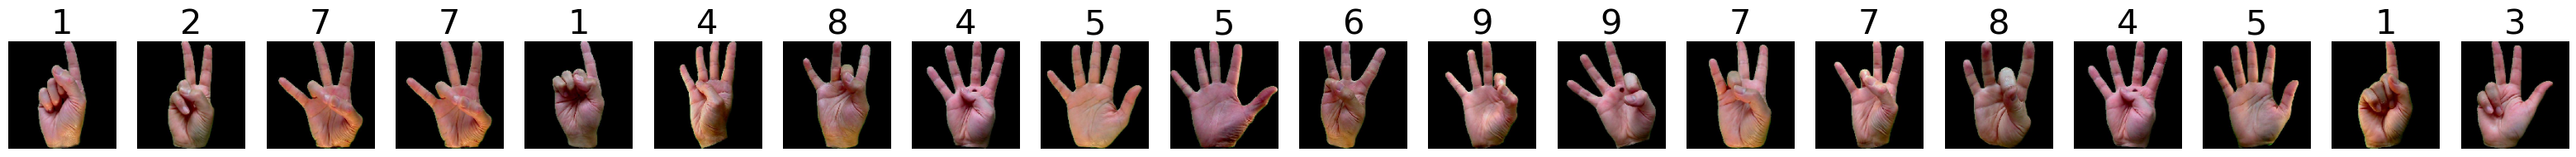

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = X_train[i]
    label = y_train[i]

    image = row
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Normalize the Image Data

In [27]:
# Convert the array to float32 as opposed to uint8
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
X_train /= 255
X_test /=  255


## Categorize/Encoding Labels

In [28]:
# Number of classes in your dataset
NUM_CLASSES = 10

print("Before label conversion to categorical: ", y_train[0:5]) # The format of the labels before conversion
y_train  = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)

print("After label conversion to categorical: ", y_train[0:5]) # The format of the labels after conversion
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

Before label conversion to categorical:  [1 2 7 7 1]
After label conversion to categorical:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Creating a Convolutional Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

# Define the input shape and number of classes
img_size = (150, 150, 3)  # Height, Width, Channels (for RGB images)
NUM_CLASSES = 10  # Example: Set this to the actual number of classes in your dataset

model = Sequential()
model.add(Conv2D(64, (5, 5), strides=1, padding="same", activation="relu", input_shape=img_size))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=NUM_CLASSES, activation="softmax"))

# Optionally, you can compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\hussa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Summarizing the Model

Here, we summarize the model we just created. Notice how it has fewer trainable parameters than the model in the previous notebook:

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 38, 38, 25)     │         7,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 38, 38, 25)     │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 19, 19, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9025)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,621,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,657,095 (17.77 MB)

 Trainable params: 4,657,045 (17.77 MB)

 Non-trainable params: 50 (200.00 B)

## Compiling the Model

We'll compile the model just like before:

In [31]:
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

## Training the Model

Despite the very different model architecture, the training looks exactly the same. Run the cell below to train for 20 epochs and let's see if the accuracy improves:

In [32]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.3,)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.3407 - loss: 7.9747 - val_accuracy: 0.7007 - val_loss: 1.8327
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.9423 - loss: 0.1819 - val_accuracy: 0.9252 - val_loss: 1.7643
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.9891 - loss: 0.0600 - val_accuracy: 0.7823 - val_loss: 1.5660
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.9222 - loss: 0.6930 - val_accuracy: 0.9456 - val_loss: 1.7033
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.9894 - loss: 0.0386 - val_accuracy: 0.9660 - val_loss: 1.6250
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9660 - val_loss: 1.5044
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 1.0000 - loss: 7.2049e-04 - val_accuracy: 0.9728 - val_loss: 1.4162
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 1.0000 - loss: 3.9294e-04 - val_accu

## Testing the Model

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9841 - loss: 0.3129
Test accuracy: 0.98


__Model Evaluation__

In [34]:
#### testing model on unseen test images
y_pred = model.predict(X_test)
#Convert class attribute back to its origional form, 0,1 from categorical [1. 0., 0. 1.]
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

#Accuracy of the model on test dataset
print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
[9 1 7 4 1 9 1 3 3 0 1 8 3 9 3 3 8 4 8 2 6 5 2 8 9]
[9 1 7 4 1 9 1 3 3 0 1 8 3 9 3 3 8 4 8 2 6 5 2 8 9]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        21
           4       1.00      0.95      0.98        21
           5       1.00      0.95      0.98        21
           6       0.91      1.00      0.95        21
           7       1.00      0.95      0.98        21
           8       0.95      0.95      0.95        21
           9       0.95      1.00      0.98        21

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

[[21  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  1  0  0  0]


## Training Curves

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


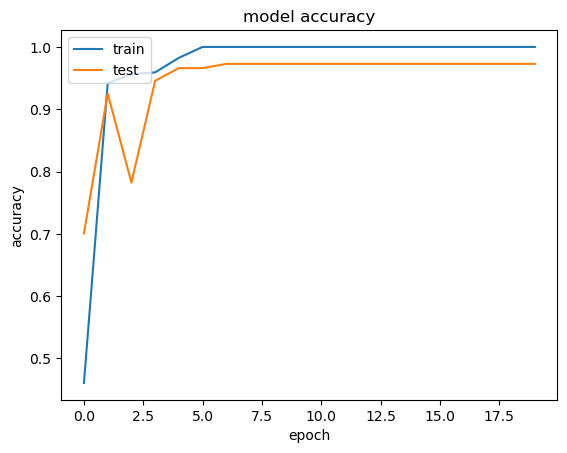

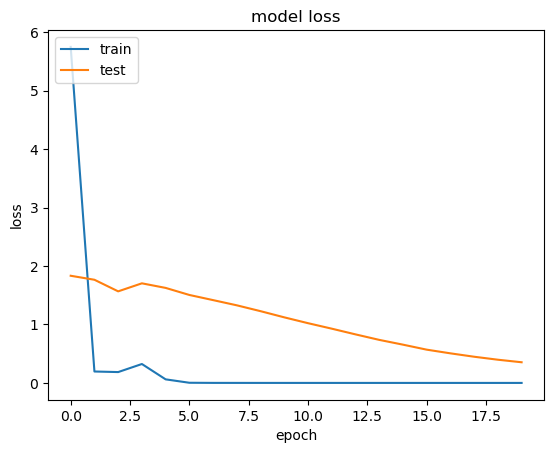

In [35]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label ="Validation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label ="Validation")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model Predictions

In [36]:
from tensorflow.keras.preprocessing import image

def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=img_size)
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(index).title()), size=18, color='red')
    plt.imshow(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


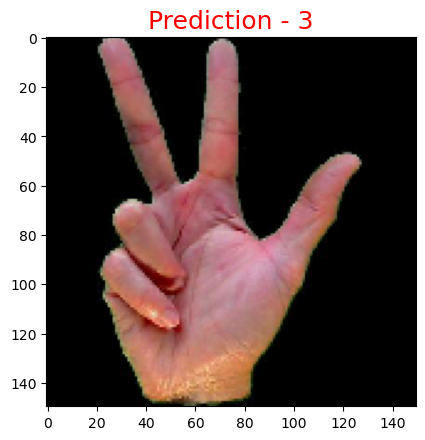

In [38]:
predict_image('C:\\Users\\hussa\\OneDrive - University of Huddersfield\\Third Year\\Data-driven Artificial Intelligence\\Data-Driven-AI\\WEEK-10\\asl_dataset\\asl_dataset\\3\\hand1_3_bot_seg_4_cropped.jpeg', model)
